<a href="https://colab.research.google.com/github/jungwoo1208/AI_Study/blob/main/softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#soft max 회귀

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
torch.manual_seed(1)

In [4]:
x_train = [[1,2,1,1],
           [3,1,3,2],
           [3,1,3,4],
           [4,1,5,5],
           [1,7,5,5],
           [1,2,5,6],
           [1,6,6,6],
           [1,7,7,7]]
y_train = [2,2,2,1,1,1,0,0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [5]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [9]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1,y_train.unsqueeze(1),1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [10]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)
    def forward(self,x):
        return self.linear(x)

In [11]:
model = SoftmaxClassifierModel()

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [14]:
epochs = 1000
for epoch in range(epochs+1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, cost.item()))

Epoch    0/1000 Cost: 0.032402
Epoch  100/1000 Cost: 0.032124
Epoch  200/1000 Cost: 0.031851
Epoch  300/1000 Cost: 0.031582
Epoch  400/1000 Cost: 0.031318
Epoch  500/1000 Cost: 0.031059
Epoch  600/1000 Cost: 0.030803
Epoch  700/1000 Cost: 0.030552
Epoch  800/1000 Cost: 0.030304
Epoch  900/1000 Cost: 0.030061
Epoch 1000/1000 Cost: 0.029822


#soft max 회귀로 MNIST 데이터 분류하기

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

cuda


In [3]:
random.seed(46)
torch.manual_seed(46)
if device == 'cuda':
    torch.cuda.manual_seed_all(46)

In [15]:
training_epchs =100
batch_size=100

In [5]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.58MB/s]


In [6]:
data_loader = DataLoader (dataset=mnist_train,
                          batch_size=batch_size,
                          shuffle=True,
                          drop_last=True)

In [7]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [8]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [16]:
for epoch in range(training_epchs):
    avg_cost = 0
    total_batch = len(data_loader)
    for x,y in data_loader:
      x=x.view(-1,28*28).to(device)

      y=y.to(device)

      optimizer.zero_grad()
      hypothesis = linear(x)
      cost = criterion(hypothesis,y)
      cost.backward()
      optimizer.step()

      avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('학습 완료')

Epoch: 0001 cost = 0.273173302
Epoch: 0002 cost = 0.271764576
Epoch: 0003 cost = 0.270627767
Epoch: 0004 cost = 0.269546628
Epoch: 0005 cost = 0.268364877
Epoch: 0006 cost = 0.267288983
Epoch: 0007 cost = 0.266451418
Epoch: 0008 cost = 0.265548468
Epoch: 0009 cost = 0.264746308
Epoch: 0010 cost = 0.263910264
Epoch: 0011 cost = 0.263221473
Epoch: 0012 cost = 0.262742311
Epoch: 0013 cost = 0.262064964
Epoch: 0014 cost = 0.261326581
Epoch: 0015 cost = 0.260727316
Epoch: 0016 cost = 0.260164857
Epoch: 0017 cost = 0.259683937
Epoch: 0018 cost = 0.259052783
Epoch: 0019 cost = 0.258637041
Epoch: 0020 cost = 0.258123279
Epoch: 0021 cost = 0.257651389
Epoch: 0022 cost = 0.257371694
Epoch: 0023 cost = 0.256815463
Epoch: 0024 cost = 0.256232947
Epoch: 0025 cost = 0.255807877
Epoch: 0026 cost = 0.255263060
Epoch: 0027 cost = 0.255052388
Epoch: 0028 cost = 0.254733622
Epoch: 0029 cost = 0.254390448
Epoch: 0030 cost = 0.254069835
Epoch: 0031 cost = 0.253664911
Epoch: 0032 cost = 0.253162295
Epoch: 0

Accuracy: 0.8695999979972839
Label:  7
Prediction:  7


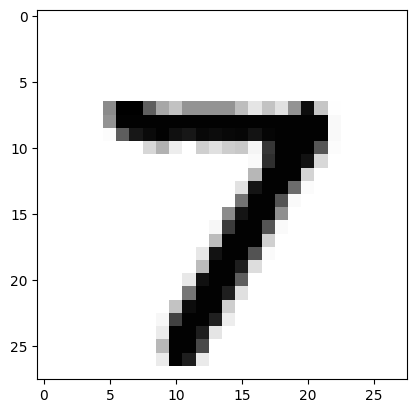

In [60]:
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()